In [4]:
import numpy as np
import pandas as pd

In [21]:
file = '/media/stephen/Data/modelling/GNG12-v2/GNG12/3000/reps/1/lammps/simulation.csv.gz'
file = '/home/stephen/Documents/testWarmup.csv'

In [35]:
dat = pd.read_csv(file, sep='\s+')

In [36]:
#single = dat.loc[(dat['type'] == 3) & (dat['time'] == 0), ['x', 'y', 'z']]
single = dat.loc[(dat['type'] == 3), ['x', 'y', 'z']]
single = single.diff(axis=0).dropna()

In [37]:
def distance(delta, dimensions):
    delta = np.where(abs(delta) > 0.5 * dimensions, abs(delta) - dimensions, delta)
    return np.sqrt((delta ** 2).sum(axis=-1))

In [38]:
single

,x,y,z
1,-0.88322,-0.39925,0.60015
2,-0.92678,-0.80778,-0.04117
3,-0.22063,-1.10981,-0.17132
4,-0.75493,-0.65694,0.32856
5,-1.05171,0.06125,0.19560
...,...,...,...
1995,1.01410,-0.25656,0.00845
1996,0.73057,-0.44012,-0.60576
1997,1.11609,-0.04657,-0.34078
1998,0.96391,0.27314,0.20705


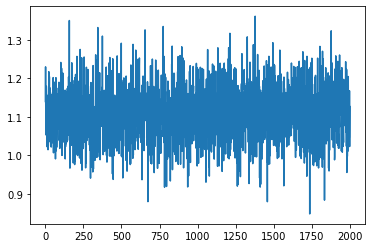

In [39]:
single.apply(distance, axis=1, args=(np.array([100, 100, 100]),)).plot()

In [170]:
file = '/media/stephen/Data/modelling/GNG12-v2/GNG12/3000/reps/1/lammps/simulation.csv.gz'
dat = pd.read_csv(file)

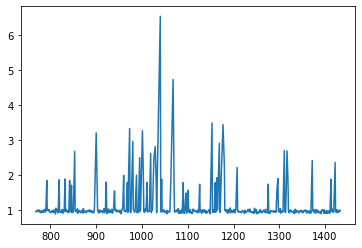

In [174]:
single = dat.loc[(dat['type'] == 3) & (dat['time'] == 1000), ['x', 'y', 'z']]
single = single.diff(axis=0).dropna()
single.apply(distance, axis=1, args=(np.array([100, 100, 100]),)).plot()

In [93]:
single[single['id'] == 1406]

,time,id,type,x,y,z,ix,iy,iz
1405,0,1406,3,49.89099,-13.25275,-22.53321,0,0,1


In [137]:
polymerOnly = dat.loc[dat['type'] ==  3]
for time, df in polymerOnly.groupby('time'):
    a = np.sqrt(((df[['x', 'y', 'z']].diff(axis=0).dropna()) ** 2).sum(axis=1))
    print(a.describe())
    break

count    1326.000000
mean        2.525037
std        11.950679
min         0.885917
25%         0.950703
50%         0.974109
75%         1.002342
max        99.686353
dtype: float64


In [77]:
2078-1406

672